<a href="https://colab.research.google.com/github/Cynthiaudoye/ExploringCrimeRates/blob/main/Crime_complete_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Important Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


In [ ]:
# Reading The Dataset
df = pd.read_csv("/content/crime_data_clean.csv")
df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,communityname,state
0,11980.0,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,...,8.20,32.81,114.85,1132.08,131.26,16.41,41.02,1394.59,BerkeleyHeightstownship,NJ
1,23123.0,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,...,21.26,102.05,242.37,1598.78,110.55,4.25,127.56,1955.95,Marpletownship,PA
2,29344.0,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,...,154.95,38.74,758.14,4972.19,376.30,60.87,218.59,6167.51,Tigardcity,OR
3,16656.0,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,...,57.86,190.93,1301.78,4142.56,271.93,NaN,306.64,NaN,Gloversvillecity,NY
4,11245.0,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,...,32.04,112.14,728.93,8490.87,728.93,40.05,NaN,9988.79,Bemidjicity,MN


In [ ]:
df.nunique()

population             2154
householdsize           198
racepctblack           1172
racePctWhite           1609
racePctAsian            667
racePctHisp            1026
agePct12t21             950
agePct12t29            1184
agePct16t24             947
agePct65up             1221
numbUrban              1600
pctUrban                293
medIncome              2141
pctWWage               1536
pctWFarmSelf            290
pctWInvInc             1774
pctWSocSec             1548
pctWPubAsst            1125
pctWRetire             1258
medFamInc              2150
perCapInc              2069
NumUnderPov            1904
PctPopUnderPov         1462
PctLess9thGrade        1275
PctNotHSGrad           1690
PctUnemployed           868
PctEmploy              1544
murdPerPop              906
rapesPerPop            1621
robbbPerPop            2060
assaultPerPop          2149
burglPerPop            2199
larcPerPop             2211
autoTheftPerPop        2172
arsonsPerPop           1577
ViolentCrimesPerPop 

In [ ]:
df.shape

(2215, 39)

In [ ]:
df.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
count,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2007.00000,2214.000000,2202.000000,2212.000000,2212.000000,2212.000000,2124.000000,1994.000000,2118.000000
mean,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,27.644840,13.975142,11.836393,...,5.859296,36.25848,162.612597,378.004605,1033.430203,3372.979150,473.965628,32.153682,589.078922,4908.241804
std,2.046203e+05,0.334120,14.247156,16.419080,4.473843,14.589832,4.518623,6.181517,5.970747,4.777565,...,9.156829,34.23975,234.486624,438.238599,763.354442,1901.316145,504.666026,39.240900,614.784518,2739.708901
min,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,1.660000,...,0.000000,0.00000,0.000000,0.000000,16.920000,77.860000,6.550000,0.000000,0.000000,116.790000
25%,1.436600e+04,2.500000,0.860000,76.320000,0.620000,0.930000,12.250000,24.415000,11.320000,8.750000,...,0.000000,11.53500,27.647500,94.187500,511.690000,2040.080000,156.952500,7.670000,161.700000,2918.070000
50%,2.279200e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,26.780000,12.540000,11.730000,...,2.170000,26.92000,74.800000,226.525000,822.715000,3079.510000,302.355000,21.080000,374.060000,4425.450000
75%,4.302400e+04,2.850000,11.145000,96.225000,2.670000,7.810000,15.360000,29.205000,14.345000,14.415000,...,8.365000,51.47000,187.155000,504.387500,1350.232500,4335.410000,589.775000,42.852500,794.400000,6229.280000
max,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,70.510000,63.620000,52.770000,...,91.090000,401.35000,2264.130000,4932.500000,11881.020000,25910.550000,4968.590000,436.370000,4877.060000,27119.760000


In [ ]:
#Checking for null values in the dataset
df.isnull().sum()

population               0
householdsize            0
racepctblack             0
racePctWhite             0
racePctAsian             0
racePctHisp              0
agePct12t21              0
agePct12t29              0
agePct16t24              0
agePct65up               0
numbUrban                0
pctUrban                 0
medIncome                0
pctWWage                 0
pctWFarmSelf             0
pctWInvInc               0
pctWSocSec               0
pctWPubAsst              0
pctWRetire               0
medFamInc                0
perCapInc                0
NumUnderPov              0
PctPopUnderPov           0
PctLess9thGrade          0
PctNotHSGrad             0
PctUnemployed            0
PctEmploy                0
murdPerPop               0
rapesPerPop            208
robbbPerPop              1
assaultPerPop           13
burglPerPop              3
larcPerPop               3
autoTheftPerPop          3
arsonsPerPop            91
ViolentCrimesPerPop    221
nonViolPerPop           97
c

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   population           2215 non-null   float64
 1   householdsize        2215 non-null   float64
 2   racepctblack         2215 non-null   float64
 3   racePctWhite         2215 non-null   float64
 4   racePctAsian         2215 non-null   float64
 5   racePctHisp          2215 non-null   float64
 6   agePct12t21          2215 non-null   float64
 7   agePct12t29          2215 non-null   float64
 8   agePct16t24          2215 non-null   float64
 9   agePct65up           2215 non-null   float64
 10  numbUrban            2215 non-null   float64
 11  pctUrban             2215 non-null   float64
 12  medIncome            2215 non-null   float64
 13  pctWWage             2215 non-null   float64
 14  pctWFarmSelf         2215 non-null   float64
 15  pctWInvInc           2215 non-null   f

In [ ]:
# Replace NaN values in each column with the median of that column
# Iterates only over numeric columns, skipping non-numeric ones
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].median(), inplace=True)

In [ ]:
df.isnull().sum()

population             0
householdsize          0
racepctblack           0
racePctWhite           0
racePctAsian           0
racePctHisp            0
agePct12t21            0
agePct12t29            0
agePct16t24            0
agePct65up             0
numbUrban              0
pctUrban               0
medIncome              0
pctWWage               0
pctWFarmSelf           0
pctWInvInc             0
pctWSocSec             0
pctWPubAsst            0
pctWRetire             0
medFamInc              0
perCapInc              0
NumUnderPov            0
PctPopUnderPov         0
PctLess9thGrade        0
PctNotHSGrad           0
PctUnemployed          0
PctEmploy              0
murdPerPop             0
rapesPerPop            0
robbbPerPop            0
assaultPerPop          0
burglPerPop            0
larcPerPop             0
autoTheftPerPop        0
arsonsPerPop           0
ViolentCrimesPerPop    0
nonViolPerPop          0
communityname          0
state                  0
dtype: int64

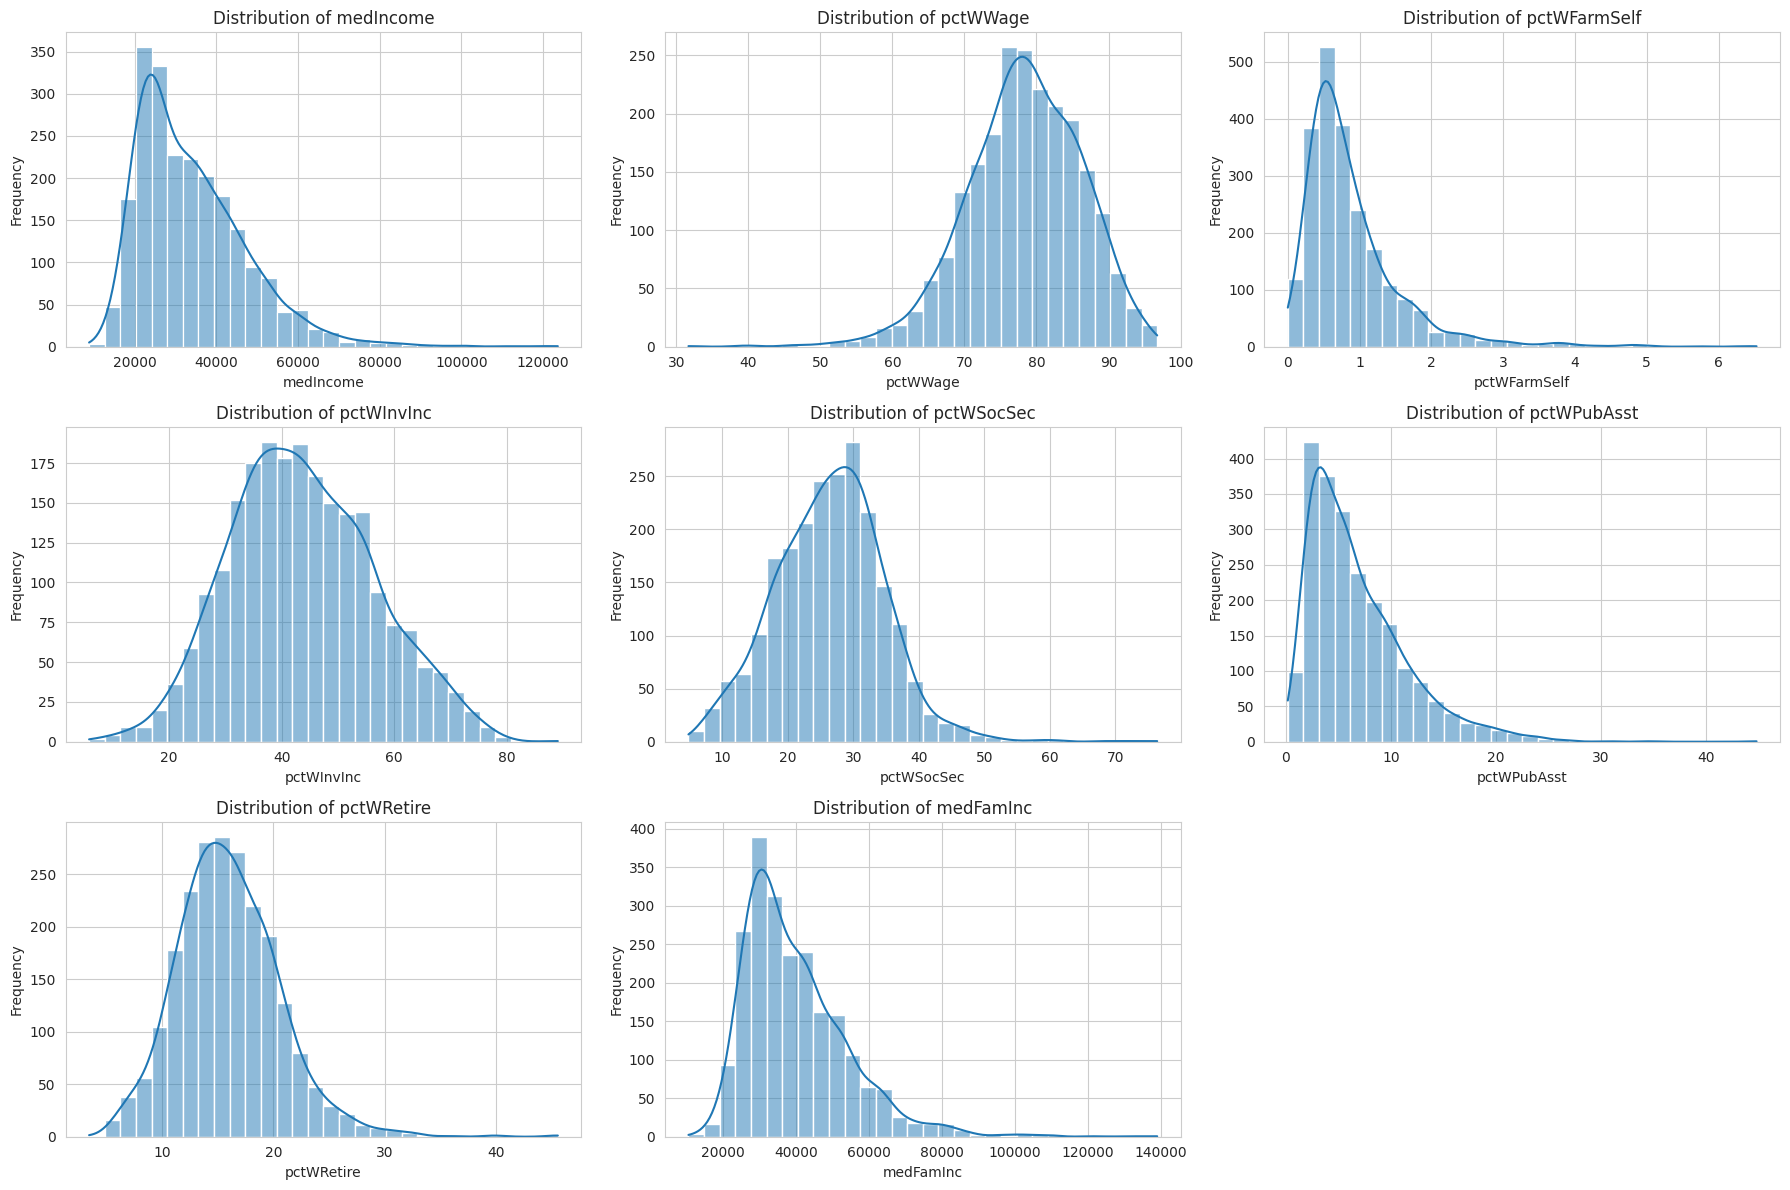

In [ ]:
# Equating the columns to variable
income_columns = ['medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc']

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for each income source
plt.figure(figsize=(18, 12))
for i, col in enumerate(income_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

**Median Income and Family Income**: The distributions of medIncome and medFamInc provide insights into the economic status of communities. A right-skewed distribution in these columns may indicate that a large portion of communities have lower income levels, with fewer communities at the higher end of the income spectrum.

**Income from Wages vs. Other Sources**: Comparing the distributions of pctWWage (percentage of households with wage income) with other income source percentages like pctWInvInc (investment income) and pctWPubAsst (public assistance income) reveals how dependent
communities are on wages versus other forms of income. A widespread reliance on wage suggest economic stability, whereas higher percentages of income from public assistance indicate economic challenges.

**Socioeconomic Diversity**: The variety in distributions across these income sources highlights the socioeconomic diversity within the dataset's communities. This diversity could be further explored in relation to demographic factors like race and age to understand the complex socioeconomic dynamics at play.

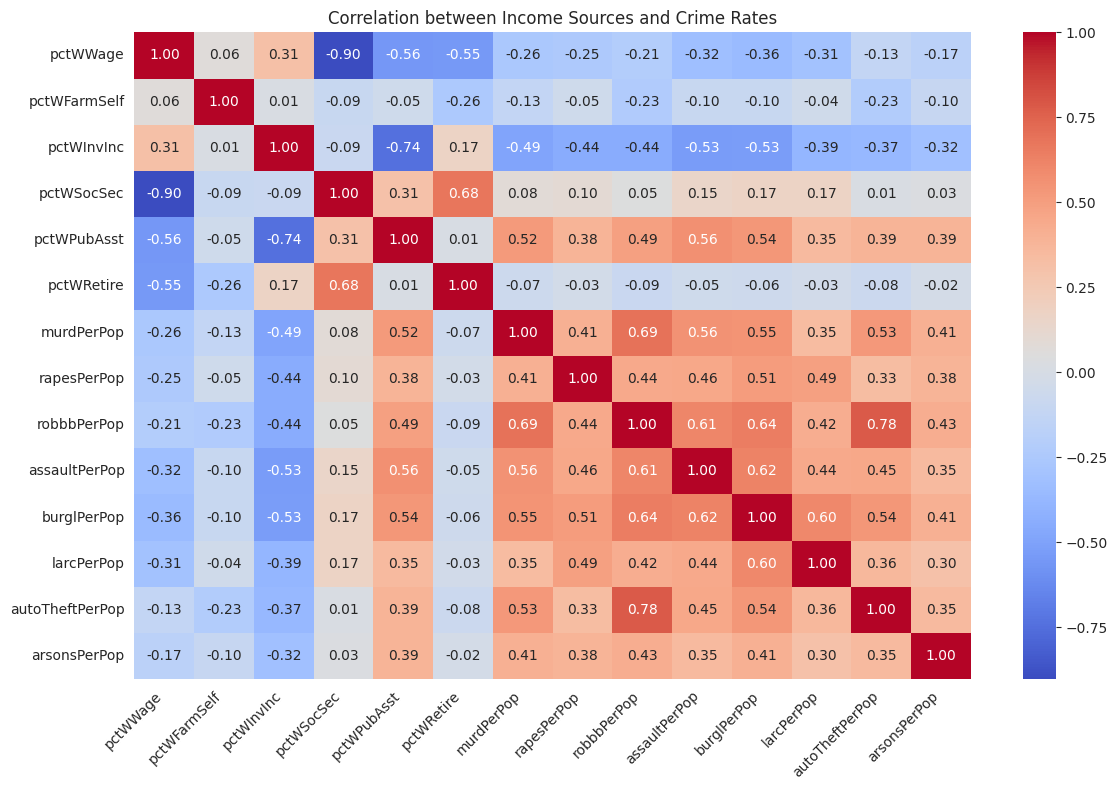

In [ ]:
# Equating the columns to variable
income_sources = ['pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire']
crime_rates = ['murdPerPop', 'rapesPerPop', 'robbbPerPop', 'assaultPerPop', 'burglPerPop', 'larcPerPop', 'autoTheftPerPop', 'arsonsPerPop']

# Creating a new DataFrame with just the selected income sources and crime rates
selected_data = df[income_sources + crime_rates]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Income Sources and Crime Rates")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Income sources like pctWInvInc (investment income)** shows negative correlations with certain crime rates, suggesting that higher investment income could be associated with lower crime rates. This indicate that wealthier communities experience less crime.

**Conversely, pctWPubAsst (public assistance income)** exhibit positive correlations with some crime rates, hinting at a possible link between economic hardship and higher crime rates.

**The strength of these correlations** vary across different types of crime, reflecting the complex socio-economic factors influencing crime rates in communities.

In [ ]:
# Filter for communities in FL and CA
fl_communities = df[df['state'] == 'FL'].sort_values(by='population', ascending=False).head(10)
ca_communities = df[df['state'] == 'CA'].sort_values(by='population', ascending=False).head(10)

# Extract the 'pctWPubAsst' values
fl_pctWPubAsst = fl_communities['pctWPubAsst']
ca_pctWPubAsst = ca_communities['pctWPubAsst']

# Perform the T-test
t_stat, p_value = stats.ttest_ind(fl_pctWPubAsst, ca_pctWPubAsst, equal_var=False)

print(f"T-Statistic: {t_stat}, P-value: {p_value}")

T-Statistic: -2.1485506478003127, P-value: 0.045639865571644775


The p-value of approximately 0.0456 indicates a statistically significant difference in the percentage of households with public assistance income between the ten most populated communities in Florida and California. This result, being just below the standard significance level of 0.05, suggests that the observed difference is unlikely due to chance. However, given its proximity to the threshold, the findings should be interpreted with caution, recognizing that further investigation into socioeconomic factors is needed to understand the practical implications of this difference.